# Self-confidence intervals, overly-confident intervals, ... oh and that concept in statistics, too
---

Tonight, we'll be collecting data from accross the world and calculating confidence intervals—fun!

In [1]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

In [2]:
full_data = Table.read_table("Life Expectancy Data.csv")

In [3]:
full_data

Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Afghanistan,2015,Developing,65,263,62,0.01,71.2796,65,1154,19.1,83,6,8.16,65,0.1,584.259,3.37365e+07,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271,64,0.01,73.5236,62,492,18.6,86,58,8.18,62,0.1,612.697,327582,17.5,17.5,0.476,10
Afghanistan,2013,Developing,59.9,268,66,0.01,73.2192,64,430,18.1,89,62,8.13,64,0.1,631.745,3.17317e+07,17.7,17.7,0.47,9.9
Afghanistan,2012,Developing,59.5,272,69,0.01,78.1842,67,2787,17.6,93,67,8.52,67,0.1,669.959,3.69696e+06,17.9,18,0.463,9.8
Afghanistan,2011,Developing,59.2,275,71,0.01,7.09711,68,3013,17.2,97,68,7.87,68,0.1,63.5372,2.9786e+06,18.2,18.2,0.454,9.5
Afghanistan,2010,Developing,58.8,279,74,0.01,79.6794,66,1989,16.7,102,66,9.2,66,0.1,553.329,2.88317e+06,18.4,18.4,0.448,9.2
Afghanistan,2009,Developing,58.6,281,77,0.01,56.7622,63,2861,16.2,106,63,9.42,63,0.1,445.893,284331,18.6,18.7,0.434,8.9
Afghanistan,2008,Developing,58.1,287,80,0.03,25.8739,64,1599,15.7,110,64,8.33,64,0.1,373.361,2.72943e+06,18.8,18.9,0.433,8.7
Afghanistan,2007,Developing,57.5,295,82,0.02,10.9102,63,1141,15.2,113,63,6.73,63,0.1,369.836,2.66168e+07,19,19.1,0.415,8.4
Afghanistan,2006,Developing,57.3,295,84,0.03,17.1715,64,1990,14.7,116,58,7.43,58,0.1,272.564,2.58934e+06,19.2,19.3,0.405,8.1


This data comes from the World Health Organization.  We can learn more about the meanings of the columns by looking here: https://www.kaggle.com/kumarajarshi/life-expectancy-who

Let's travel back in time to the year 2015 and collect some data!  For the duration of this discussion, we're going to consider the following data to be our *"population"*.

Let's take a look at it.

In [4]:
recent_data = full_data.where("Year", 2015)

In [5]:
recent_data

Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Afghanistan,2015,Developing,65,263,62,0.01,71.2796,65,1154,19.1,83,6,8.16,65,0.1,584.259,3.37365e+07,17.2,17.3,0.479,10.1
Albania,2015,Developing,77.8,74,0,4.6,364.975,99,0,58,0,99,6,99,0.1,3954.23,28873,1.2,1.3,0.762,14.2
Algeria,2015,Developing,75.6,19,21,nan,0,95,63,59.5,24,95,nan,95,0.1,4132.76,3.98715e+07,6,5.8,0.743,14.4
Angola,2015,Developing,52.4,335,66,nan,0,64,118,23.3,98,7,nan,64,1.9,3695.79,2.78594e+06,8.3,8.2,0.531,11.4
Antigua and Barbuda,2015,Developing,76.4,13,0,nan,0,99,0,47.7,0,86,nan,99,0.2,13567,nan,3.3,3.3,0.784,13.9
Argentina,2015,Developing,76.3,116,8,nan,0,94,0,62.8,9,93,nan,94,0.1,13467.1,4.34178e+07,1,0.9,0.826,17.3
Armenia,2015,Developing,74.8,118,1,nan,0,94,33,54.9,1,96,nan,94,0.1,369.655,291695,2.1,2.2,0.741,12.7
Australia,2015,Developed,82.8,59,1,nan,0,93,74,66.6,1,93,nan,93,0.1,56554.4,2.37893e+07,0.6,0.6,0.937,20.4
Austria,2015,Developed,81.5,65,0,nan,0,93,309,57.6,0,93,nan,93,0.1,43665.9,8.63317e+06,1.9,2.1,0.892,15.9
Azerbaijan,2015,Developing,72.7,118,5,nan,0,96,0,52.5,6,98,nan,96,0.1,55.3138,9.64934e+06,2.8,2.9,0.758,12.7


In [6]:
# Let's visualize our population distribution.

# Defining a function to create bins easily.
# We want our bins to go from the min to the max (inclusive!)
def get_bins(array, bin_size=1):
    return np.arange(
        int(min(array)), int(max(array)) + 1 + bin_size, bin_size
    )

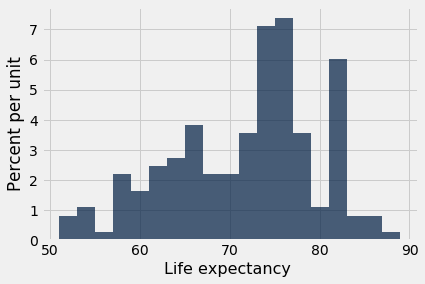

In [7]:
MEASURE = 3

data = recent_data.where(MEASURE, are.above_or_equal_to(0)) # This is just to remove nans

measured = data.column(MEASURE)

bins = get_bins(measured, 2) # <-- Try playing around with the bin size

data.hist(MEASURE, bins=bins)

In [8]:
# This is our ... ?

```
"POPULATION" DISTRIBUTION
```

So, what is our aim?  We want to estimate the average life expectancy for the globe!  Let's say we don't have access to the entire population.  Flying around the world is pretty expensive, so we can only collect data from 15 countries

As are standard procedures, we'll be creating a confidence interval around this estimate.  We can sample and use bootstrapping to find this.

In [10]:
# How do we create a representative sample?
collected = data.sample(15, with_replacement=False)

In [11]:
collected

Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
United Kingdom of Great Britain and Northern Ireland,2015,Developed,81.2,69,3,10.66,0,nan,91,66.6,4,96,nan,96,0.1,nan,nan,0.8,0.6,nan,nan
Solomon Islands,2015,Developing,69.2,177,0,nan,0,98,0,5.5,0,99,nan,98,0.1,1922.41,587482,1.1,1.2,0.514,9.6
Canada,2015,Developing,82.2,64,2,nan,0,55,195,67,2,91,nan,91,0.1,43315.7,3.58486e+06,0.6,0.5,0.919,16.3
Serbia,2015,Developing,75.6,121,1,nan,0,94,383,6,1,95,nan,95,0.1,5237.26,795383,2,2,0.775,14.4
Greece,2015,Developing,81,72,0,nan,0,96,1,66.5,0,99,nan,99,0.1,187.79,182883,0.8,0.7,0.865,17.2
Comoros,2015,Developing,63.5,227,1,nan,0,91,0,24.2,2,92,nan,91,0.8,727.646,777424,6.7,6.5,0.498,11.1
Botswana,2015,Developing,65.7,256,2,nan,0,95,0,37.9,2,96,nan,95,2.2,6532.65,229197,6.4,6.1,0.698,12.6
Tajikistan,2015,Developing,69.7,161,10,nan,0,96,3,4.7,11,96,nan,96,0.2,918.677,8.54865e+06,3.6,3.7,0.625,11.3
Turkmenistan,2015,Developing,66.3,215,6,nan,0,99,0,48.6,7,99,nan,99,0.1,6432.67,5.56528e+06,3.3,3.3,0.688,10.8
Madagascar,2015,Developing,65.5,22,28,nan,0,69,3,2.5,38,71,nan,69,0.3,41.8576,2.42349e+06,7.1,7.1,0.511,10.3


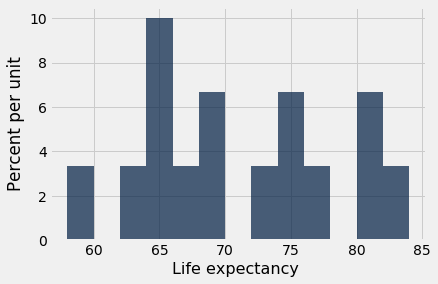

In [12]:
collected.hist(MEASURE, bins=get_bins(collected.column(MEASURE), 2))

In [13]:
# This is our ...?

```
SAMPLE DISTRIBUTION
```

We're interested in estimating the mean life expectancy.  So, let's find the mean of our sample.

In [14]:
sample_mean = np.mean(collected.column(MEASURE))
sample_mean

71.12666666666665

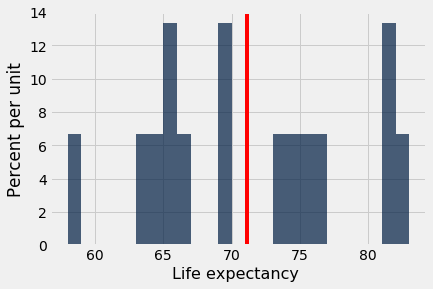

In [15]:
# We can show our mean in relation to the sample.

collected.hist(MEASURE, bins=get_bins(collected.column(MEASURE)))
plt.axvline(sample_mean, c='r')

In [16]:
# This red line is our ... ?

```
SAMPLE MEAN (this is a sample statistic)
```

What happens when we resample?

The resampled mean is:		 72.68666666666668 
Compared to the original:	 71.12666666666665


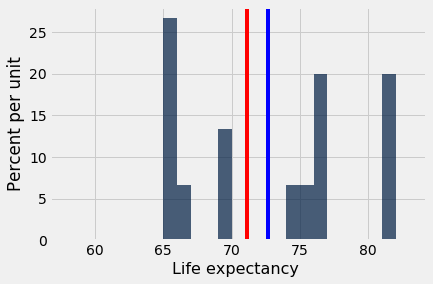

In [19]:
# Run this multiple time to see what changes.

resampled = collected.sample()
resampled_mean = np.mean(resampled.column(MEASURE))

print("The resampled mean is:\t\t", resampled_mean, "\nCompared to the original:\t", sample_mean)

resampled.hist(MEASURE, bins=get_bins(collected.column(MEASURE)))
plt.axvline(resampled_mean, c='b')
plt.axvline(sample_mean, c='r')

In [20]:
# This blue line is our ... ?

```
Resampled mean.
```

Now, let's run the bootstrap so we can create our confidence interval!

(array([  0.,   1.,   2.,   4.,  16.,  32.,  58.,  95., 158., 220., 326.,
        404., 458., 517., 583., 543., 439., 366., 305., 190., 131.,  81.,
         27.,  28.,   8.,   4.,   4.,   0.]),
 array([64. , 64.5, 65. , 65.5, 66. , 66.5, 67. , 67.5, 68. , 68.5, 69. ,
        69.5, 70. , 70.5, 71. , 71.5, 72. , 72.5, 73. , 73.5, 74. , 74.5,
        75. , 75.5, 76. , 76.5, 77. , 77.5, 78. ]),
 <a list of 28 Patch objects>)

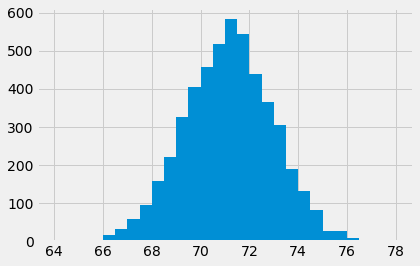

In [21]:
sample_means = []

for i in range(5000):
    bootstrapped = collected.sample()
    boot_mean = np.mean(bootstrapped.column(MEASURE))
    sample_means.append(boot_mean)

plt.hist(sample_means, bins=get_bins(sample_means, 0.5))

In [22]:
# This is our ... ?

```
DISTRIBUTION OF SAMPLE MEANS
```

Recall, the confidence interval uses percentiles as the bounds.

In [23]:
# First, we choose a confidence level.
confidence_level = 95

# What is the mean we're estimating?
mean = np.mean(collected.column(MEASURE))

# And then our lower and upper bounds?
# Let's try to find a way to calculate them regardless of our confidence level.
lower_bound = percentile((100 - confidence_level) / 2, sample_means)
upper_bound = percentile(confidence_level + (100 - confidence_level) / 2, sample_means)

# Printing it out so we can easily see our results.
print("""
 Mean:\t{}

Lower:\t{}
Upper:\t{}

Level:\t{}%
""".format(mean, lower_bound, upper_bound, confidence_level))


 Mean:	71.12666666666665

Lower:	67.64000000000001
Upper:	74.66666666666669

Level:	95%



In [24]:
# How do we interpret this confidence interval?

```
We are 95% confident that the true population mean life expectancy lies in the range [64.1, 72.6].
```

Out of curiosity... what's the distance between our bounds and the mean?

Before we find them—what do you expect to see?

In [25]:
# Dist between lower and mean
mean - lower_bound

3.486666666666636

In [26]:
# Dist between upper and mean
upper_bound - mean

3.5400000000000347

# Let's get a feel for how the distribution of sample means arises
---

We'll take a bunch of resamples and visualize the distribution of their as the number of resamples increases.

In [28]:
from IPython.display import clear_output

Resamples:	 5000


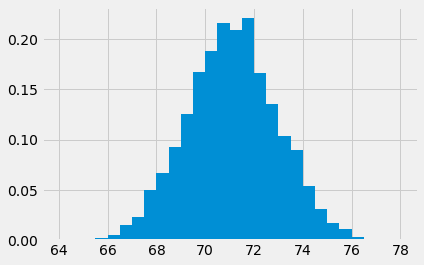

In [30]:
trials = 5000

sample_means = []

update_var = 1

for i in range(trials):
    boots = collected.sample()
    boot_mean = np.mean(boots.column(MEASURE))
    sample_means.append(boot_mean)
    
    # Update the plot every once in a while (more frequently at lower values)
    if i >= update_var - 1 or i==trials - 1:
        update_var *= 1.25
        clear_output(wait=True)
        
        plt.hist(sample_means, normed=True, bins=get_bins(sample_means, 0.5))
        
        plt.pause(0.01)

        print("Resamples:\t",i + 1)
        plt.show()

# A bit of recap
---

Let's draw some things on the chalkboard.

- Our **POPULATION DISTRIBUTION** is unknown, and can be any shape.


- A **SAMPLE DISTRIBUTION** should have a shape roughly similar to the population distribution.  
(provided that the sample was large enough and was properly randomized)


- A **SAMPLE MEAN** is just the mean of that sample distribution.


- We can collect a handful of sample means (or fake it by bootstrapping)


- The **DISTRIBUTION OF SAMPLE MEANS** will resemble a normal distribution as the number of sample means increases.


- The **CENTER/MEAN** of the distribution of sample means should be similar to the true population mean.  
(provided that our original sample was proper)

In [31]:
# Let's try this out on another column to see if the above claims hold!

# What if I told you there's another way?
---

Since we know that a normal distribution will arise as the number of resamples increases, then do we really need to go through all the effort of running a bootstrap?

Instead, we can rely on what we know about normal distributions!  The two defining features of a normal distribution are its center/mean and it's spread/standard deviation.

So, what's the standard deviation of the normal distribution that arises?

In [32]:
from scipy.stats import norm

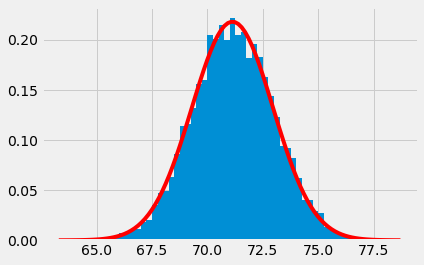

In [33]:
# Running a bootstrap again to get the distribution
resampled_means = [np.mean(collected.sample().column(MEASURE)) for i in range(10000)]

plt.hist(resampled_means, bins=get_bins(resampled_means, 0.25), normed=True)


# Plotting a normal curve over the top of it.

mean = np.mean(collected.column(MEASURE)) # The mean of the normal should be ..?

# Let's figure out what the standard deviation of the normal should be!
# Well, it *should* be:
#
# Sample Distr. SD = Pop SD / sqrt(Sample Size)
#
# But, we don't have access to population sd,
# so instead, we use sample sd.

std = np.std(collected.column(MEASURE)) / np.sqrt(collected.num_rows)

x = np.linspace(*plt.xlim(), 100)
plt.plot(x, norm.pdf(x, mean, std), c='r')

So, we can create our CI mathemagically instead of running the bootstrap!

For our normal curve, we'll have:
$$Mean = Sample\ Mean$$

$$Standard\ Deviation = \frac{Sample\ SD}{\sqrt{Sample\ Size}}$$

Now that we have a normal curve with a mean and standard deviation, how do we find the confidence interval from before?

In [34]:
# We know that 95% of data is within 1.96 standard deviations of
# the mean of a normal distribution.

mean = np.mean(collected.column(MEASURE))

# What's the SD of the distrib. of sample means again?
std = np.std(collected.column(MEASURE)) / np.sqrt(collected.num_rows)

lower_bound = mean - 1.96 * std
upper_bound = mean + 1.96 * std

print("""
 Mean:\t{}

Lower:\t{}
Upper:\t{}

Level:\t95%
""".format(mean, lower_bound, upper_bound))


 Mean:	71.12666666666665

Lower:	67.54032644922223
Upper:	74.71300688411107

Level:	95%



Just like before, I'm curious to see the distance between our bounds and mean.

In [35]:
# Dist between lower and mean
mean - lower_bound

3.586340217444416

In [36]:
# Dist between upper and mean
upper_bound - mean

3.586340217444416

In [37]:
# How close was out bootstrap interval to the normal interval?

```
Pretty close!
```

In [38]:
# What happens if we decrease/increase the number of resamples?

```
Decrease resamples: further away
Increase resamples: closer
```

Cool!  Now, since we do have the *"population"* that we're estimating, let's check the validity of our confidence interval.

In [39]:
# What was the population mean?
pop_mean = np.mean(data.column(MEASURE))
pop_mean

71.61693989071038

In [40]:
# Is the population mean inside of our interval?
# I want a statement that returns either True or False
lower_bound <= pop_mean <= upper_bound

True

In [41]:
# How likely are we to have the true population mean within a
# confidence interval calculated as above?

```
95%
```

In [42]:
# Should we test this out together at the end?

```
YES
```

# Interval widths
---

What if we think our interval size is too big?  How does our interval size change as other parameters change?

In [43]:
# Provided that we want to keep 95% level of confidence, how will we narrow
# our interval width?

In [44]:
# BEFORE we answer that, let's think about one more thing:
#
# What is the width of our interval (roughly), in terms of
# our mean and standard deviation?


$$Interval\ Width = 4 * Normal\ SD$$

$$Interval\ Width = 4 * \frac{Sample\ SD}{\sqrt{Sample\ Size}}$$

In [45]:
# So, how do we narrow our interval width?

```
Increase the sample size!
```

In [46]:
# Is there anything wrong with what we've done above?
# Hint: representative sample?

```
Our sample size seemed a bit small...  So let's try it again with 30 and see if we get a distribution that more closely resembles the population!
```

In [47]:
# What happens if we can't tolerate a 5% chance of being wrong?
#
# If this is really important, we may want 99.7% confidence!
#
# What will happen to the width of our interval?

```
Width increases and confidence increases.
```

In [48]:
# What will our interval width be in term of mean and standard deviation?

To answer this, we need to know the "Empirical Rule".

It goes a little something like this:

|# of SD away from mean|% of data contained in ± #SD|
|---|---|
|1|68%|
|2|95%|
|3|99.7%|

In [49]:
# So, we can calculate the CI if we need 99.7% confidence

mean = np.mean(collected.column(MEASURE))

std = np.std(collected.column(MEASURE)) / np.sqrt(collected.num_rows)

lower_bound_997 = mean - 3 * std
upper_bound_997 = mean + 3 * std

print("""
 Mean:\t{}

Lower:\t{}
Upper:\t{}

Level:\t95%
""".format(mean, lower_bound_997, upper_bound_997))


 Mean:	71.12666666666665

Lower:	65.63737041547621
Upper:	76.61596291785709

Level:	95%



In [50]:
# Let's look at the bounds for 95% versus 99.7% confidence
print("""
95% Lower:\t{0}\t99.7% Lower:\t{2}
95% Upper:\t{1}\t99.7% Upper:\t{3}
""".format(lower_bound, upper_bound, lower_bound_997, upper_bound_997))


95% Lower:	67.54032644922223	99.7% Lower:	65.63737041547621
95% Upper:	74.71300688411107	99.7% Upper:	76.61596291785709



That's all for now, folks!

If we have time, let's see if we can empirically calculate a probability for how often our population mean is within our mathematically-calculated confidence interval.

In [51]:
# If I take a bunch of samples and for once I compute a 95% CI
# Then, I expect the probability of the population mean falling
# in those CI's to be 95%









In [52]:
count = 0

trials = 5000

for i in range(trials):
    
    
    sample = data.sample(30, with_replacement=False).column(MEASURE)
    
    
    mean = np.mean(sample)
    std = np.std(sample) / np.sqrt(len(sample))
    
    
    lower = mean - 1.96 * std
    upper = mean + 1.96 * std
    
    # Is the population mean within our interval?
    in_interval = lower <= pop_mean <= upper
    
    if in_interval:
        count += 1
        
    
print("The interval containined the population mean", (count / trials) * 100, "% of the time!")

The interval containined the population mean 95.72 % of the time!
